## Pull Down Schedule from SGDQ Website

In [3]:
import requests
import json
from bs4 import BeautifulSoup

In [80]:
req = requests.get('https://gamesdonequick.com/schedule')
soup = BeautifulSoup(req.text)
table = soup.find('tbody')

first_rows = table.findAll('tr', attrs={'class': None})
games = list()
for row in first_rows:
    second_row = row.findNext('tr', attrs={'class': 'second-row'})
    duration = 0
    if second_row:
        duration = second_row.findNext('td').text.strip()
    runner_text = row.find('td', attrs={'rowspan': 2})
    runner = runner_text.text.strip() if runner_text else ""
    game = {
        'title': row.find('td', attrs={'class': None}).text,
        'duration': duration,
        'runner': runner
    }
    games.append(game)

## Remove Blacklisted 'Games' 
(e.g. Setup Blocks)

In [81]:
black_list = ['Pre-Show', 'Setup Block', 'Finale']

games = [x for x in games if not any(x['title'].startswith(y) for y in black_list)]

## Download Game Data
Requests user input for ambiguous responses

(Takes a long time)

In [93]:
from IPython.display import clear_output
def search_game(name):
    base_url = "http://www.giantbomb.com/api"
    api_key = "1a2b6ca5a6672075fad627af8567197ebc76740f"
    headers = {'User-agent': 'Python'}
    # Construct query URL
    url = (base_url + "/search/?api_key={0}&format=json&query=\"{1}\"/resouces='game'&limit=10".
        format(api_key, name.encode('ascii','replace')))
    response = requests.get(url, headers=headers).text
    results = json.loads(response)
    for i, res in enumerate(results['results'][:10]):
        if(res['name'] == name):
            return res
        print "{0}: {1}".format(i,res['name'].encode('ascii', 'replace'))
    print "Title: {0}".format(name.encode('ascii', 'replace'))
    correct = int(input("Correct Index: "))
    if correct < 0:
        return {}
    return results['results'][correct]

for i, game in enumerate(games):
    if 'data' in game and game['data'] is not None:
        continue
    print "\r({0}/{1}) Searching for: {2}".format(i + 1, len(games), game['title'].encode('ascii', 'ignore'))
    game['data'] = search_game(games[i]['title'])


(160/164) Searching for: Pokmon Red
0: Sintel: The Game
1: Virus: The Game
2: Game of Emperors
3: Zombie Game
4: The Simpsons Game
5: Wipeout: The Game
6: Space Game
7: BECK: The Game
8: The Game of Harmony
9: Game Party
Title: Pok?mon Red
Correct Index: -1
(161/164) Searching for: TAS Block
0: Sintel: The Game
1: Virus: The Game
2: Game of Emperors
3: Zombie Game
4: The Simpsons Game
5: Wipeout: The Game
6: Space Game
7: BECK: The Game
8: The Game of Harmony
9: Game Party
Title: TAS Block
Correct Index: -1
(162/164) Searching for: Final Fantasy VI
(163/164) Searching for: Super Metroid
(164/164) Searching for: Super Mario RPG: Legend of the Seven Stars


### Manually Fix Games

In [100]:
def search_id(game_id):
    base_url = "http://www.giantbomb.com/api"
    api_key = "1a2b6ca5a6672075fad627af8567197ebc76740f"
    headers = {'User-agent': 'Python'}
    # Construct query URL
    url = (base_url + "/game/{1}/?api_key={0}&format=json".
        format(api_key, game_id))
    response = requests.get(url, headers=headers).text
    try:
        results = json.loads(response)
    except Exception as e:
        print response
    return results['results']
for game in games:
    if game['data'] == {}:
        print "Title: {0}".format(game['title'].encode('ascii', 'replace'))
        game_id = raw_input("Game ID: ")
        if game_id == "x":
            continue
        game['data'] = search_id(game_id)
actual_games = [x for x in games if x['data']]


Title: Runny Egg
Game ID: x
Title: Sonic Colors DS
Game ID: 3030-31428
Title: Sonic the Hedgehog (2006)
Game ID: 3030-20584
Title: Final Doom: The Plutonia Experiment
Game ID: 3030-750
Title: Gimmick!
Game ID: 3030-6037
Title: Tetris: The Grand Master Series Exhibition
Game ID: 3030-42507
Title: Kirby & the Amazing Mirror
Game ID: 3030-3095
Title: Pok?mon Red
Game ID: 3030-3966
Title: TAS Block
Game ID: x


### Manually add platform being played during SGDQ

In [9]:
for i, game in enumerate(actual_games):
    if "platform" in game:
        continue
    actual_games[i]['platform'] = raw_input("({0}/{1}) {2}:".format(i + 1, len(actual_games), game['title'].encode('ascii', 'replace')))

(1/162) Super Mario Sunshine:Wii
(2/162) The Legend of Zelda: A Link Between Worlds:3DS
(3/162) Demon's Souls:PS3
(4/162) Bastion:PC
(5/162) Mighty Switch Force! HyperDrive Edition:PC
(6/162) Donkey Kong Country: Tropical Freeze:Wii U
(7/162) Metroid Prime:Wii
(8/162) Catherine:PS3
(9/162) New Super Mario Bros. 2:3DS
(10/162) Mario Kart: Double Dash!!:Gamecube
(11/162) FAST Racing NEO:Wii U
(12/162) Crash Team Racing:PS2
(13/162) 1080 Avalanche:Gamecube
(14/162) Tony Hawk's Underground:PC
(15/162) The Rapid Angel:PSTV
(16/162) Crystal's Pony Tale:Genesis
(17/162) Ed, Edd, 'n Eddy: The Mis-Edventures:Gamecube
(18/162) Harry Potter and the Chamber of Secrets:PC
(19/162) Barbie Game Girl:Gameboy
(20/162) Speedy Gonzales: Los Gatos Bandidos:SNES
(21/162) The Flintstones: The Surprise at Dinosaur Peak!:NES
(22/162) The Land Before Time:GBA
(23/162) The Incredible Crash Dummies:NES
(24/162) The Goonies II:NES
(25/162) Claymates:SNES
(26/162) ActRaiser:SNES
(27/162) Sparkster:SNES
(28/162) Ha

## Dump JSON

In [137]:
with open("games_list.txt", "w+") as f:
    for game in actual_games:
        f.write(json.dumps(game) + "\n")

### Load from JSON

In [138]:
actual_games = list()
with open ('games_list.txt', 'r') as f:
    for line in f.read().split('\n'):
        try:
            actual_games.append(json.loads(line))
        except Exception as e:
            pass

## Graphs

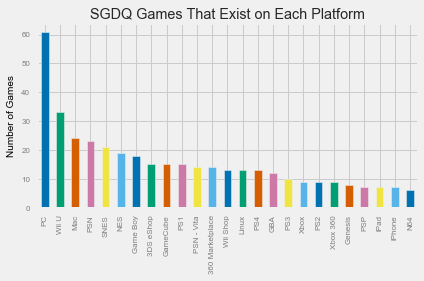

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import itertools 
%matplotlib inline  

plt.style.use('fivethirtyeight')

plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['figure.titlesize'] = 12

palette = itertools.cycle(sns.color_palette('colorblind', 25))

platforms = list()
for game in actual_games:
    if 'platforms' in game['data'] and game['data']['platforms']:
        platforms += ([x['name'] for x in game['data']['platforms']])
platforms = pd.Series(platforms)
figure = plt.figure()
ax = platforms.value_counts()[:25].plot(kind='bar', color = [palette.next() for x in range(25)])
shortnames = ['PC', 'Wii U', 'Mac', 'PSN', 'SNES' ,'NES', 'Game Boy', '3DS eShop', 'GameCube',
             'PS1', 'PSN - Vita', '360 Marketplace', 'Wii Shop', 'Linux', 'PS4', 'GBA', 'PS3',
              'Xbox', 'PS2', 'Xbox 360', 'Genesis', 'PSP', 'iPad', 'iPhone', 'N64'] 
ax.set_xticklabels(shortnames)

for x in range(25):
    ax.get_xticklabels()[x].title = shortnames
plt.ylabel('Number of Games')
plt.title("SGDQ Games That Exist on Each Platform")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()
plt.savefig('general_platform_counts.png', bbox_inches='tight', dpi=250)


Earliest Release
title           Zelda II: The Adventure of Link
duration                        0 days 01:05:00
runner                           Simpol, Pro_JN
platform                                    NES
release_date                1987-01-14 00:00:00
Name: 104, dtype: object

Latest Release
title           Momodora: Reverie Under the Moonlight
duration                              0 days 00:40:00
runner                                Halfcoordinated
platform                                           PC
release_date                      2016-03-04 00:00:00
Name: 61, dtype: object

Min Duration
title                   Celeste
duration        0 days 00:05:00
runner              SecksWrecks
platform                     PC
release_date                NaT
Name: 57, dtype: object

Max Duration
title              Final Fantasy VI
duration            0 days 04:05:00
runner              bichphuongballz
platform                       SNES
release_date    1994-04-02 00:00:00
Name: 159, dtyp

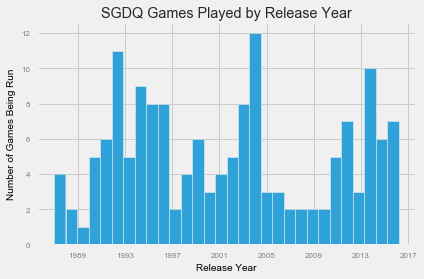

In [140]:

actual_games[0]['data']
game_frame = pd.DataFrame()

game_frame['title'] = [x['title'] for x in actual_games]
game_frame['duration'] = [str(x['duration']) for x in actual_games]
game_frame['runner'] = [x['runner'] for x in actual_games]
game_frame['platform'] = [x['platform'] for x in actual_games]
game_frame['release_date'] = [x['data']['original_release_date'] if 'original_release_date' 
                           in x['data'] else None for x in actual_games]
game_frame['release_date'] = pd.to_datetime(game_frame['release_date'])
game_frame['duration'] = pd.to_timedelta(game_frame['duration'])

print "\nEarliest Release"
print game_frame.ix[game_frame['release_date'].idxmin()]
print "\nLatest Release"
print game_frame.ix[game_frame['release_date'].idxmax()]

print "\nMin Duration"
print game_frame.ix[game_frame['duration'].idxmin()]
print "\nMax Duration"
print game_frame.ix[game_frame['duration'].idxmax()]


ax = game_frame['release_date'].hist(bins=30)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Release Year')
plt.title('SGDQ Games Played by Release Year')
plt.ylabel('Number of Games Being Run')
plt.tight_layout()
plt.savefig("num_games_by_year.png", dpi=260)

Text(0.5,1,u'SGDQ Speedrun Time by Release Year')

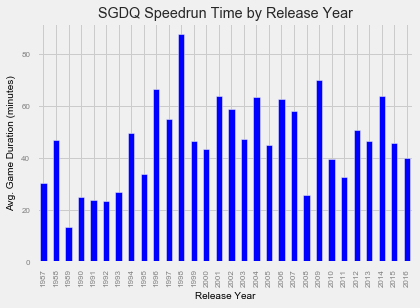

In [141]:
duration_grouped = game_frame.groupby(lambda x: game_frame.ix[x]['release_date'].year)
duration_by_year = duration_grouped.aggregate(np.sum)['duration'].astype('timedelta64[m]')
mean_duration_by_year = duration_by_year / duration_grouped.count()['duration']
ax = mean_duration_by_year.plot(kind='bar')
xtl = [item.get_text()[:4] for item in ax.get_xticklabels()]
_=ax.set_xticklabels(xtl)
plt.xlabel("Release Year")
plt.ylabel("Avg. Game Duration (minutes)")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.title("SGDQ Speedrun Time by Release Year")

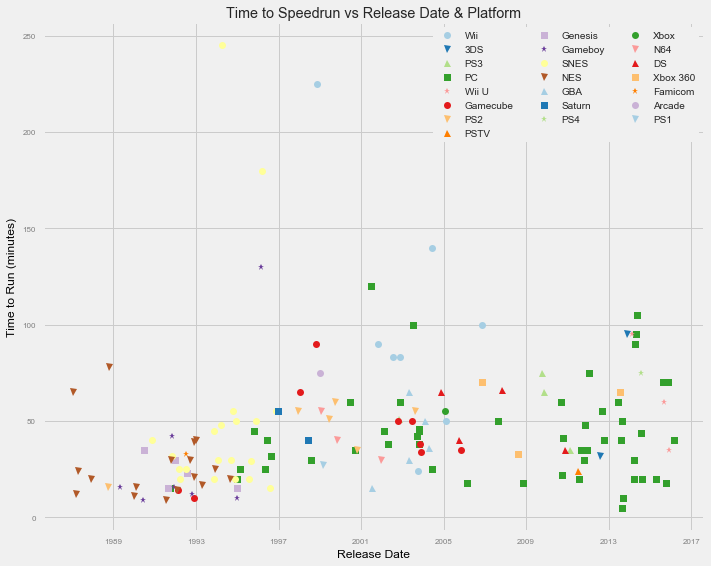

In [142]:
game_frame['minutes'] = game_frame['duration'].astype('timedelta64[m]')
game_frame_corrected = game_frame[pd.notnull(game_frame['release_date'])]
game_frame_corrected = game_frame_corrected.reset_index()
import matplotlib.cm as cm
import itertools

platforms = game_frame_corrected['platform'].unique()
palette = itertools.cycle(sns.color_palette('Paired', 21))
color_dict = dict()
for p in platforms:
    color_dict[p] = palette.next()
def map_platform(platform):
    if platform in color_dict:
        return color_dict[platform]
    else:
        return "r"
    
mapped_platforms = list(map_platform(x) for x in game_frame_corrected['platform'])


markers = itertools.cycle(['o', 'v', '^', 's', '*'])
fig, ax = plt.subplots(figsize=(10,8))

for platform in platforms:
    plt_series = game_frame_corrected[game_frame_corrected['platform'] == platform]
    ax.plot_date(x=plt_series.release_date, y=plt_series.minutes,
                  color=map_platform(platform),
                  label=platform, marker=markers.next(), linewidth=1)
plt.xlabel("Release Date", fontsize=12)
plt.ylabel("Time to Run (minutes)", fontsize=12)
legend = ax.legend(loc="upper right", frameon = True, ncol=3)
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor("#F0F0F0")
plt.title("Time to Speedrun vs Release Date & Platform")
plt.tight_layout()
plt.savefig('running_time_v_release_date.png', dpi=250)


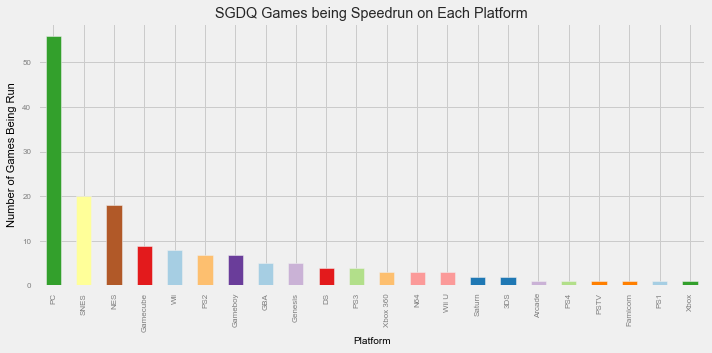

In [148]:
counts = game_frame['platform'].value_counts()
colors_for_graph = [map_platform(x) for x in counts.index]
plt.figure(figsize=(10,5))
ax = game_frame['platform'].value_counts().plot(kind='bar', color = colors_for_graph)
plt.xlabel("Platform", fontsize=10)
plt.ylabel("Number of Games Being Run", fontsize=11)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.title("SGDQ Games being Speedrun on Each Platform")
plt.tight_layout()
plt.savefig('platforms_run.png', dpi=250)

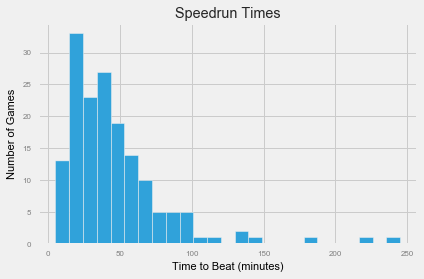

In [144]:
ax = game_frame['minutes'].hist(bins=25)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel("Time to Beat (minutes)", fontsize=11)
plt.ylabel("Number of Games", fontsize=11)
plt.title("Speedrun Times")
plt.tight_layout()
plt.savefig('time_to_run_histogram.png', bb_inches='tight')

## CSV for D3.js

In [147]:
import codecs
with codecs.open("games_list.csv", "w+", encoding='utf8') as f:
    game_frame.drop('duration', axis=1).to_csv(f) # 'Minutes' will be more useful